In [1]:
#!python --version
#!pip install darts

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.utils.missing_values import missing_values_ratio ,fill_missing_values

In [3]:
df=pd.read_csv('pricesChennai.csv')
#df.head()
#df.describe()
#df.shape

In [5]:
def create_imputed_timeseries(c):
    #c is the column that we plan to forecast
    new_df=df[[c,'23']]
    
    #converting to proper data time object
    new_df['day'] =  pd.to_datetime(new_df['23'], format='%d/%m/%Y')
    new_df.drop('23', axis=1, inplace=True)
    new_df.rename(columns = {c:'price'}, inplace = True)
    
    #create Time series object
    commodity=TimeSeries.from_dataframe(new_df,time_col='day',value_cols='price')
    
    #impute missing values
    commodity_imputed=fill_missing_values(commodity)
    return commodity,commodity_imputed

    

<AxesSubplot:xlabel='23'>

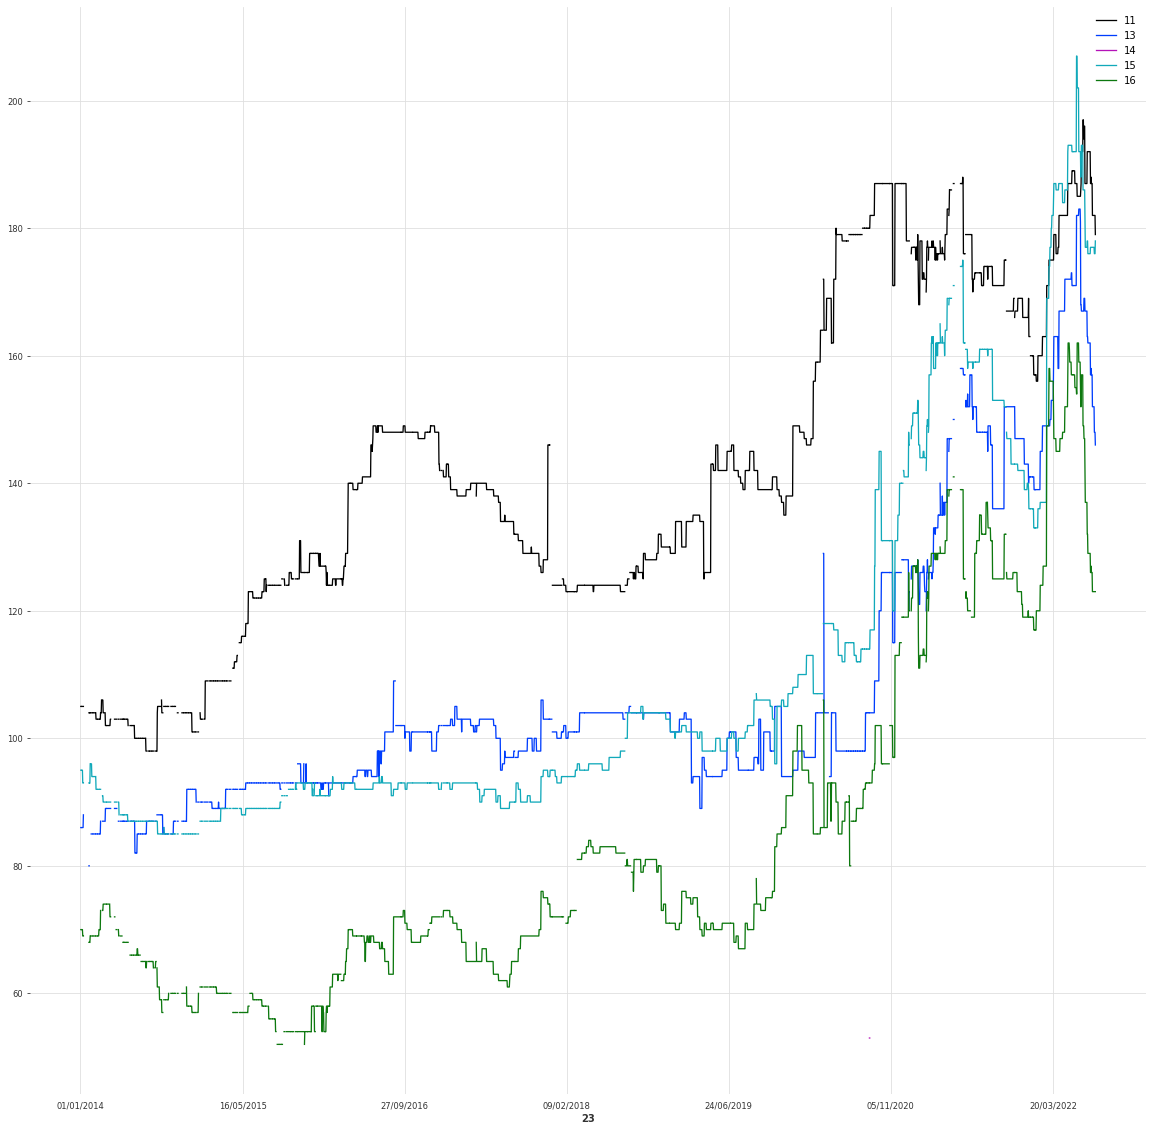

In [83]:
df.plot.line(x=23,y=[11,13,14,15,16],figsize=(20,20))

In [16]:
commodity_orig,commodity_cleaned=create_imputed_timeseries('11')

C:\Users\hp\AppData\Local\Temp\ipykernel_8220\55082371.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['day'] =  pd.to_datetime(new_df['23'], format='%d/%m/%Y')
C:\Users\hp\AppData\Local\Temp\ipykernel_8220\55082371.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop('23', axis=1, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_8220\55082371.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

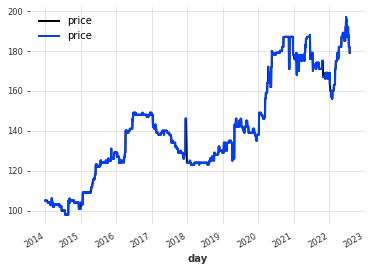

In [58]:
commodity_cleaned.plot()
commodity_orig.plot()

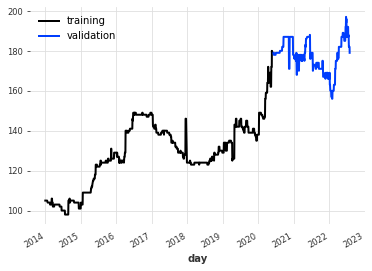

In [25]:
train, val = commodity_cleaned.split_before(0.75)
train.plot(label="training")
val.plot(label="validation")

In [6]:
# from darts.utils.statistics import plot_acf, check_seasonality

# plot_acf(train, m=12, alpha=0.05)
# #absolutely no seasonality - proved as there is no peak after the 0 point. 
# #It seems to be continuously dectrasing from that

In [8]:
# from darts.models import  NBEATSModel
# from darts.metrics import mape

In [7]:
# #DEFINING THE MODEL 
# NBEATS_MODEL = NBEATSModel(input_chunk_length = 30, output_chunk_length =7 , n_epochs=100, random_state=0)
# #give the .fit method the training series and the validation series
# NBEATS_MODEL.fit(train,val_series = val, verbose=True)
# #get the predictions for the next TESTING DATA, 6 MONTH = 360 DAYS 
# pred = NBEATS_MODEL.predict(n=720, series = train  )
# #get the error using the mape
# pred_error = mape(val[:720],pred)
# #error_follower = mape(val_follower[:36],pred_follower)
# print("this is the error for the price:",pred_error )

In [15]:
# #rice Prices
# new_df=df[['1','23']]
# #converting to proper data time object
# new_df['Day'] =  pd.to_datetime(new_df['23'], format='%d/%m/%Y')
# new_df.drop('23', axis=1, inplace=True)
# new_df.rename(columns = {'1':'Price'}, inplace = True)
# #new_df.dtypes
# #new_df.head()
# rice=TimeSeries.from_dataframe(new_df,time_col='Day',value_cols='Price')
# rice.plot()

In [21]:
# percentage of missing values in the dataset
missing_values_ratio(commodity_orig)*100

12.51596424010217

In [22]:
#imputing the missing values using the pandas interpolate function in the backend.
# the data is here imputed in a linear interpolation.
# See more information on here:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html
#rice_imputed=fill_missing_values(rice)
#rice_imputed.plot()

In [81]:
#new_df['Price'].plot(figsize=(20, 20))

In [80]:
# Watch the imputed chart in large detail (large size plot of the same thing)

# rice_imputed_df=rice_imputed.pd_dataframe()
# rice_imputed_df.plot(figsize=(20, 20))


In [84]:
# rice_imputed.plot()
# rice.plot()

In [18]:
commodity_list='''Rice#1
Wheat#2
Atta (Wheat)#3
Gram Dal#4
Tur/Arhar Dal#5
Urad Dal	#6
Moong Dal#7
Masoor Dal#8
Sugar#9
Milk @#10
Groundnut Oil (Packed)#11
Mustard Oil (Packed)#12
Vanaspati (Packed)#13
Soya Oil (Packed)#14
Sunflower Oil (Packed)#15
Palm Oil (Packed)#16
Gur#17
Tea Loose#18
Salt Pack (Iodised)#19
Potato#20
Onion#21
Tomato#22'''

'Rice#1\nWheat#2\nAtta (Wheat)#3\nGram Dal#4\nTur/Arhar Dal#5\nUrad Dal\t#6\nMoong Dal#7\nMasoor Dal#8\nSugar#9\nMilk @#10\nGroundnut Oil (Packed)#11\nMustard Oil (Packed)#12\nVanaspati (Packed)#13\nSoya Oil (Packed)#14\nSunflower Oil (Packed)#15\nPalm Oil (Packed)#16\nGur#17\nTea Loose#18\nSalt Pack (Iodised)#19\nPotato#20\nOnion#21\nTomato#22'

# Fuel Prices EDA for chennai Dataset (from the fuel scrapped data)

In [84]:
df1=pd.read_csv('Chennaipetrol.csv')
df1['date'] =  pd.to_datetime(df1['date'], format='%Y-%m-%d')
#df1.head() #petrol price
#df1.plot.line(x='date',y='rate',figsize=(20,20))

# removing a duplicate row at index 2019-11-1 (has 2 different petrol values)
#df1[df1['date']=='2019-11-1']
df1.drop(555,inplace=True)
df1=df1.reset_index()
df1.drop('index', axis=1, inplace=True)

In [85]:
# Select the index of the commodity for which you want to predict the price
c='16'#Palm oil prices

In [86]:
# creating a merged table
df2=df[[c,'23']]#commodity prices
df2['day'] =  pd.to_datetime(df2['23'], format='%d/%m/%Y')
df2.drop('23', axis=1, inplace=True)
df2.rename(columns = {c:'comm_price','day':'date'}, inplace = True)
df3=df2.merge(df1, how='left', on='date')
df3.drop('city', axis=1, inplace=True)
# df3.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_10268\2197505613.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['day'] =  pd.to_datetime(df2['23'], format='%d/%m/%Y')
C:\Users\hp\AppData\Local\Temp\ipykernel_10268\2197505613.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('23', axis=1, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_10268\2197505613.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [87]:
df3_cut=df3[df3['date']>='2017-06-26']
df3_cut.head()

,comm_price,date,rate
1273,65.0,2017-06-26,66.03
1274,65.0,2017-06-27,65.89
1275,63.0,2017-06-28,65.94
1276,63.0,2017-06-29,65.90
1277,63.0,2017-06-30,65.78


<AxesSubplot:xlabel='date'>

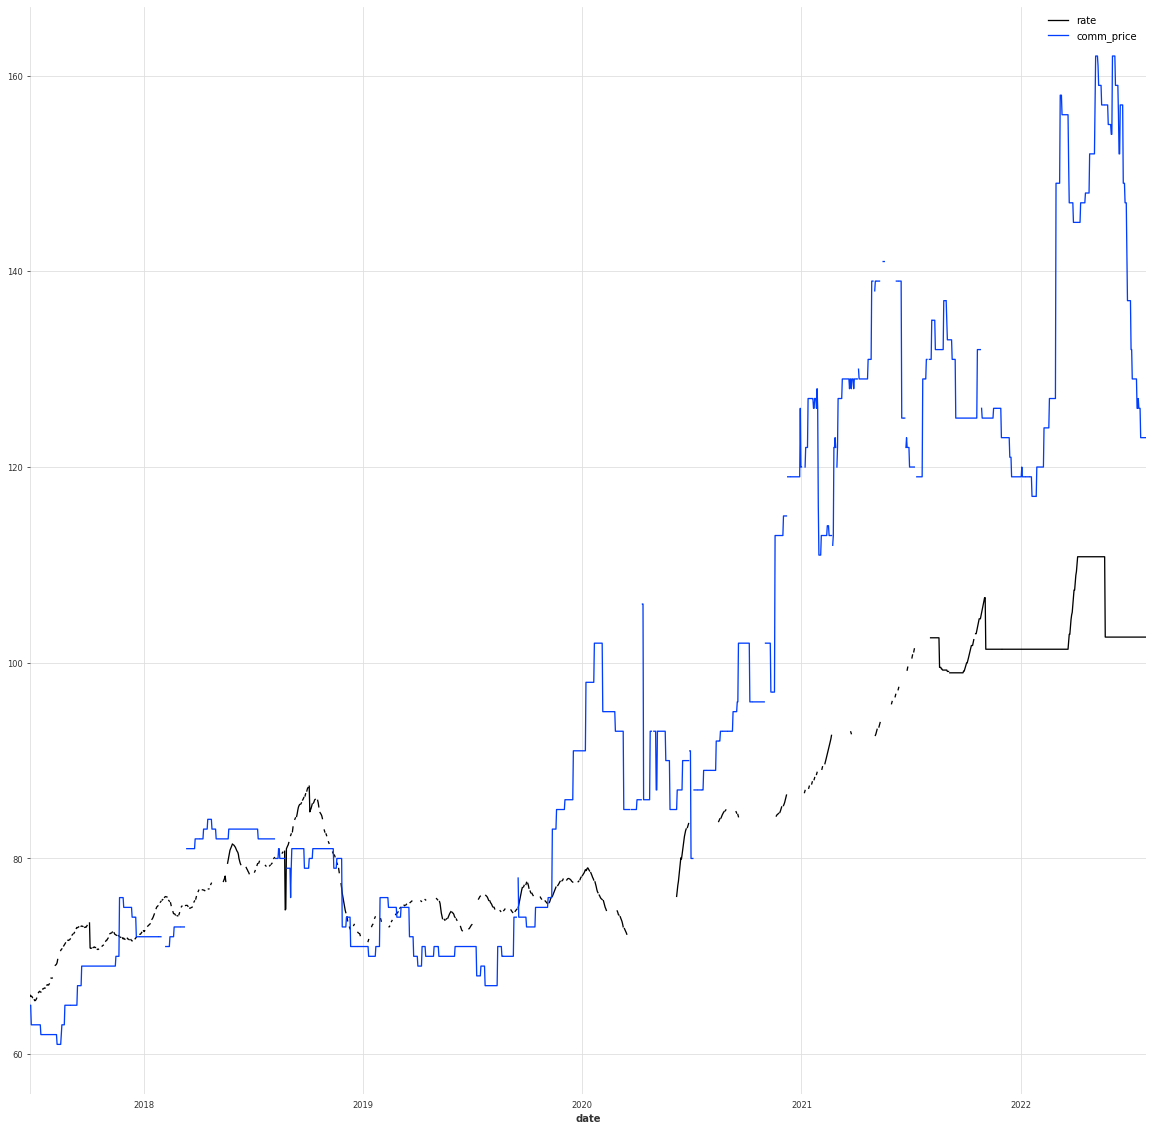

In [88]:
#df3_cut['rate'].plot()
df3_cut.plot.line(x='date',y=['rate','comm_price'],figsize=(20,20))

In [71]:
#df1[df1['date']=='11-1-2019']

In [194]:
new_df1=df3_cut[['rate','date']]
#new_df1.rename(columns = {'date':'day'}, inplace = True)
new_df1=new_df1.reset_index()
# # # #create Time series object
petrol_chennai=TimeSeries.from_dataframe(new_df1,value_cols='rate',time_col='date')

# #impute missing values
petrol_chennai_imputed=fill_missing_values(petrol_chennai)

2022-08-12 00:17:29 darts.timeseries ERROR: ValueError: The time index of the provided DataArray is missing the freq attribute, and the frequency could not be directly inferred. This probably comes from inconsistent date frequencies with missing dates. If you know the actual frequency, try setting `fill_missing_dates=True, freq=actual_frequency`. If not, try setting `fill_missing_dates=True, freq=None` to see if a frequency can be inferred.


ValueError: The time index of the provided DataArray is missing the freq attribute, and the frequency could not be directly inferred. This probably comes from inconsistent date frequencies with missing dates. If you know the actual frequency, try setting `fill_missing_dates=True, freq=actual_frequency`. If not, try setting `fill_missing_dates=True, freq=None` to see if a frequency can be inferred.

<AxesSubplot:xlabel='date'>

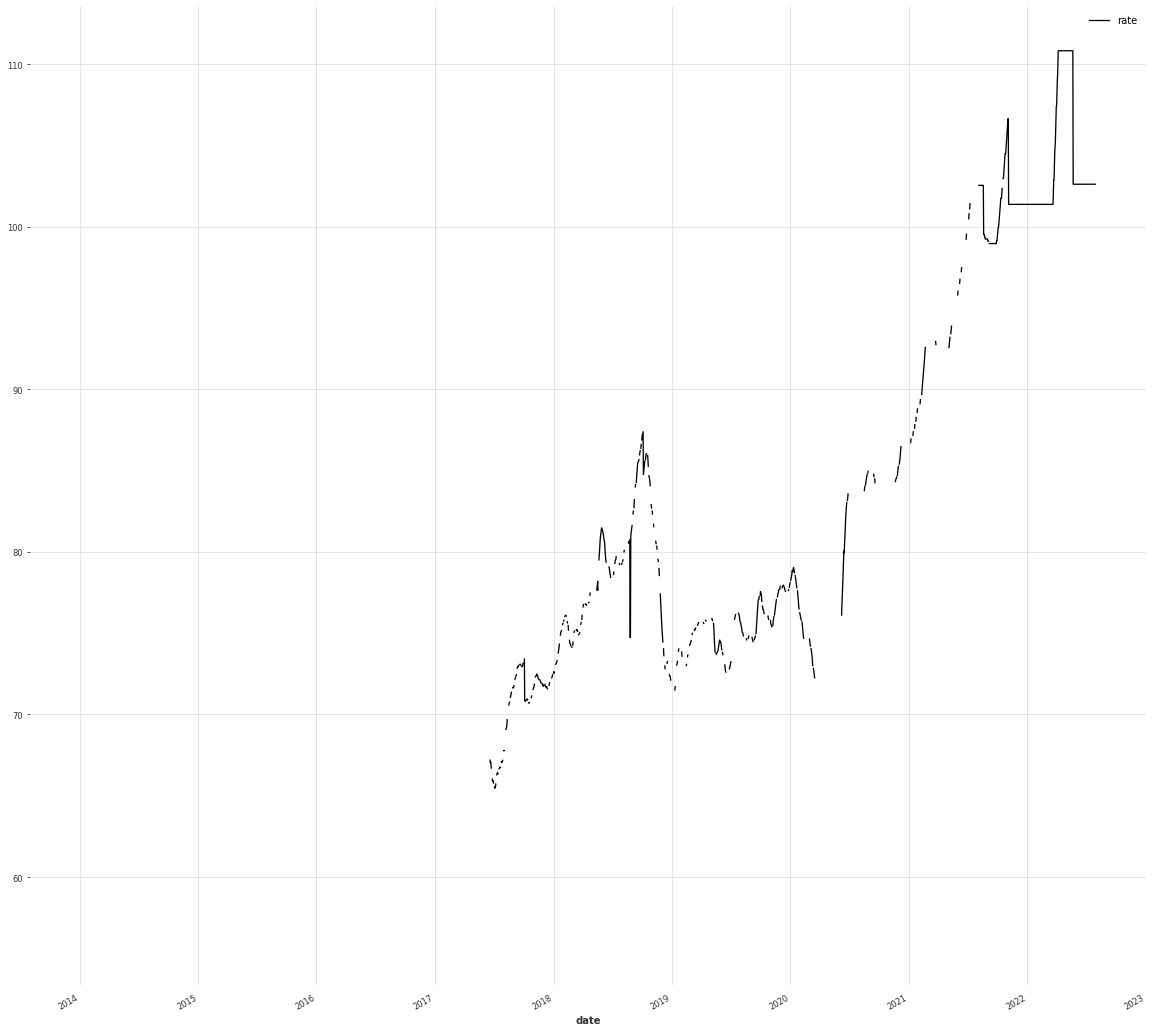

In [106]:
df3.plot.line(x='date',y=['rate'],figsize=(20,20))

In [108]:
df2.dtypes

component
price           float64
date     datetime64[ns]
dtype: object

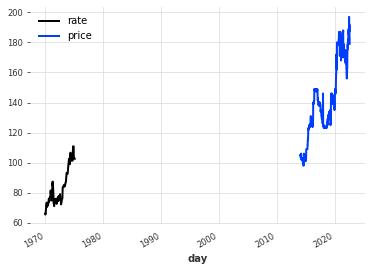

In [192]:
petrol_chennai_imputed.plot()
commodity_cleaned.plot()


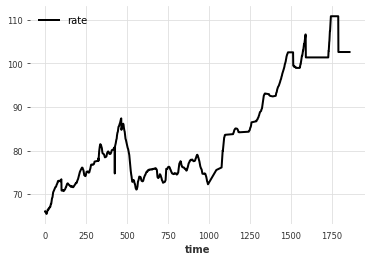

In [189]:
petrol_chennai_imputed.plot()

In [134]:
df3.dtypes

price           float64
date     datetime64[ns]
city             object
rate            float64
dtype: object

In [163]:
df1.dtypes

city            object
date    datetime64[ns]
rate           float64
dtype: object